In [1]:
import os.path

import numpy as np

!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns
import warnings

!pip install imblearn
%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\yashj\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib-3.5.2.dist-info\\METADATA'


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\yashj\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib-3.5.2.dist-info\\METADATA'


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading the cleaned data

In [2]:
bank_additional_cleaned = pd.read_csv('df_cleaned_final.csv')
bank_additional_cleaned.head()

,index,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y,PC1,PC2
0,0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,0,-1.35089,0.681003
1,1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,0,-1.35089,0.681003
2,2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,0,-1.35089,0.681003
3,3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,0,-1.35089,0.681003
4,4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,0,-1.35089,0.681003


In [3]:
bank_additional_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37089 entries, 0 to 37088
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        37089 non-null  int64  
 1   age          37089 non-null  int64  
 2   job          37089 non-null  object 
 3   marital      37089 non-null  object 
 4   education    37089 non-null  object 
 5   housing      37089 non-null  object 
 6   loan         37089 non-null  object 
 7   contact      37089 non-null  object 
 8   month        37089 non-null  object 
 9   day_of_week  37089 non-null  object 
 10  duration     37089 non-null  int64  
 11  campaign     37089 non-null  int64  
 12  previous     37089 non-null  int64  
 13  poutcome     37089 non-null  object 
 14  y            37089 non-null  int64  
 15  PC1          37089 non-null  float64
 16  PC2          37089 non-null  float64
dtypes: float64(2), int64(6), object(9)
memory usage: 4.8+ MB


### Statistical Analysis

In [4]:
bank_additional_cleaned.describe()

,index,age,duration,campaign,previous,y,PC1,PC2
count,37089.000000,37089.000000,37089.000000,37089.000000,37089.000000,37089.000000,3.708900e+04,3.708900e+04
mean,20834.313813,39.976435,218.035994,2.120548,0.180377,0.092966,-1.471317e-16,-2.452195e-17
std,11979.948479,10.444770,157.079518,1.416367,0.504650,0.290388,1.861271e+00,9.913897e-01
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-1.926106e+00,-2.306013e+00
25%,10376.000000,32.000000,103.000000,1.000000,0.000000,0.000000,-1.501540e+00,-6.630327e-01
50%,21086.000000,38.000000,174.000000,2.000000,0.000000,0.000000,-1.345099e+00,-2.185852e-01
75%,31244.000000,47.000000,293.000000,3.000000,0.000000,0.000000,2.259685e+00,6.810311e-01
max,41187.000000,98.000000,752.000000,7.000000,7.000000,1.000000,3.570304e+00,3.425593e+00


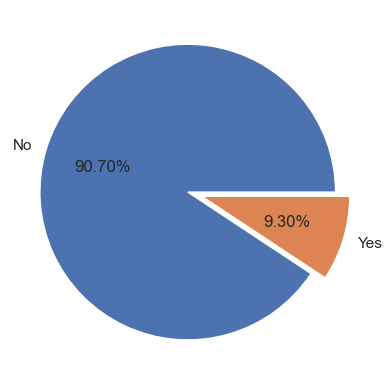

In [5]:
plt.pie(bank_additional_cleaned['y'].map({0:'No',1:'Yes'}).value_counts(),labels = bank_additional_cleaned['y'].map({0:'No',1:'Yes'}).value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

### EDA of numerical features

#### 1. Correlation matrix

<Axes: >

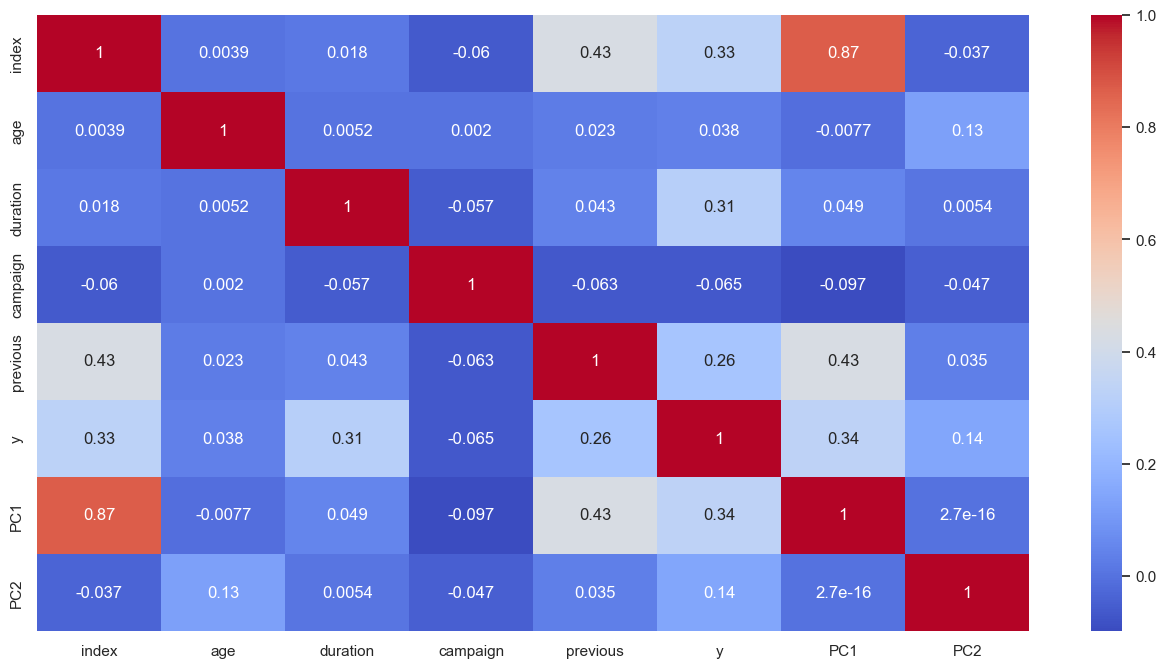

In [6]:
corr_matrix = bank_additional_cleaned.select_dtypes(exclude="object").corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True)

## SMOTE & label (Yash Jadwani)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [8]:
bank_additional_cleaned['education'] = bank_additional_cleaned['education'].str.replace('.',' ',regex=True)

In [9]:
cat_cols = list(bank_additional_cleaned.select_dtypes(include=['object','category']).columns)

le = LabelEncoder()
for col in cat_cols:
    bank_additional_cleaned[col] = le.fit_transform(bank_additional_cleaned[col].astype(str))

bank_additional_cleaned

,index,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y,PC1,PC2
0,0,56,3,1,0,0,0,1,6,1,261,1,0,1,0,-1.350890,0.681003
1,1,57,7,1,3,0,0,1,6,1,149,1,0,1,0,-1.350890,0.681003
2,2,37,7,1,3,1,0,1,6,1,226,1,0,1,0,-1.350890,0.681003
3,3,40,0,1,1,0,0,1,6,1,151,1,0,1,0,-1.350890,0.681003
4,4,56,7,1,3,0,1,1,6,1,307,1,0,1,0,-1.350890,0.681003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37084,41183,73,5,1,5,1,0,0,7,0,334,1,0,1,1,1.929928,-2.306013
37085,41184,46,1,1,5,0,0,0,7,0,383,1,0,1,0,1.929928,-2.306013
37086,41185,56,5,1,6,1,0,0,7,0,189,2,0,1,0,1.929928,-2.306013
37087,41186,44,9,1,5,0,0,0,7,0,442,1,0,1,1,1.929928,-2.306013


In [10]:
bank_additional_cleaned['age'] = bank_additional_cleaned.age.astype(int)
bank_additional_cleaned['campaign'] = bank_additional_cleaned.campaign.astype(int)
bank_additional_cleaned['previous'] = bank_additional_cleaned.previous.astype(int)
bank_additional_cleaned['poutcome'] = bank_additional_cleaned.poutcome.astype(int)
bank_additional_cleaned['y'] = bank_additional_cleaned.y.astype(int)

In [11]:
bank_additional_cleaned

,index,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y,PC1,PC2
0,0,56,3,1,0,0,0,1,6,1,261,1,0,1,0,-1.350890,0.681003
1,1,57,7,1,3,0,0,1,6,1,149,1,0,1,0,-1.350890,0.681003
2,2,37,7,1,3,1,0,1,6,1,226,1,0,1,0,-1.350890,0.681003
3,3,40,0,1,1,0,0,1,6,1,151,1,0,1,0,-1.350890,0.681003
4,4,56,7,1,3,0,1,1,6,1,307,1,0,1,0,-1.350890,0.681003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37084,41183,73,5,1,5,1,0,0,7,0,334,1,0,1,1,1.929928,-2.306013
37085,41184,46,1,1,5,0,0,0,7,0,383,1,0,1,0,1.929928,-2.306013
37086,41185,56,5,1,6,1,0,0,7,0,189,2,0,1,0,1.929928,-2.306013
37087,41186,44,9,1,5,0,0,0,7,0,442,1,0,1,1,1.929928,-2.306013


In [12]:
bank_additional_cleaned.isnull().sum()

index          0
age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
PC1            0
PC2            0
dtype: int64

In [13]:
bank_additional_cleaned.dropna(inplace=True)
bank_additional_cleaned.isnull().sum()

index          0
age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
PC1            0
PC2            0
dtype: int64

In [14]:
X = bank_additional_cleaned.drop('y', axis = 1)
Y = bank_additional_cleaned['y']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

### Treating data imbalance with SMOTE

In [15]:
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [16]:
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)

In [17]:
Y_train.value_counts()

1    26914
0    26914
Name: y, dtype: int64

In [18]:
def printClassificationAndConfusionMatrix(y_test,y_pred,classifier):
    print(f'Scores for {classifier}\n')

    print(classification_report(y_test, y_pred))
    print("Test Accuracy:",round(accuracy_score(y_pred, y_test),2))

    plt.figure(figsize=(5,4))
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_matrix,annot=True, fmt="d",cmap="Blues")
    plt.title(f'Confusion Matrix : {classifier}')
    plt.show()


### Models


Logistic Regression 

Logistic Regression Train Accuracy: 84.76 %

Scores for Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      6727
           1       0.31      0.79      0.44       691

    accuracy                           0.81      7418
   macro avg       0.64      0.80      0.66      7418
weighted avg       0.91      0.81      0.85      7418

Test Accuracy: 0.81


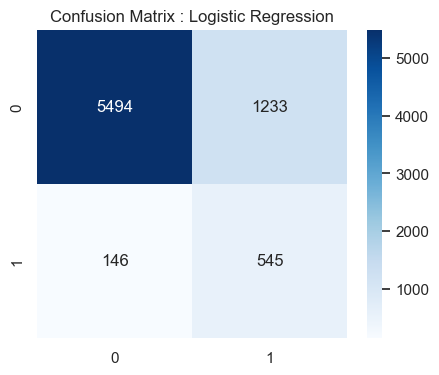

------------------------------------------------------------------------

Random Tree Classifier 

Random Tree Classifier Train Accuracy: 95.28 %

Scores for Random Tree Classifier

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6727
           1       0.54      0.70      0.61       691

    accuracy                           0.92      7418
   macro avg       0.75      0.82      0.78      7418
weighted avg       0.93      0.92      0.92      7418

Test Accuracy: 0.92


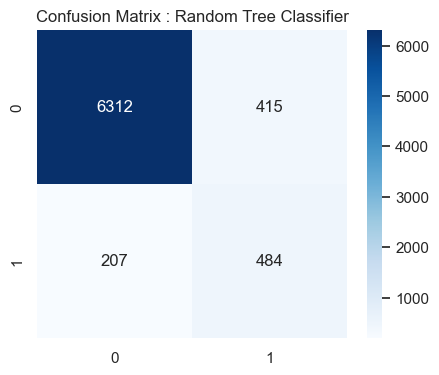

------------------------------------------------------------------------

Decision Tree 

Decision Tree Train Accuracy: 92.9 %

Scores for Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6727
           1       0.44      0.58      0.50       691

    accuracy                           0.89      7418
   macro avg       0.70      0.75      0.72      7418
weighted avg       0.91      0.89      0.90      7418

Test Accuracy: 0.89


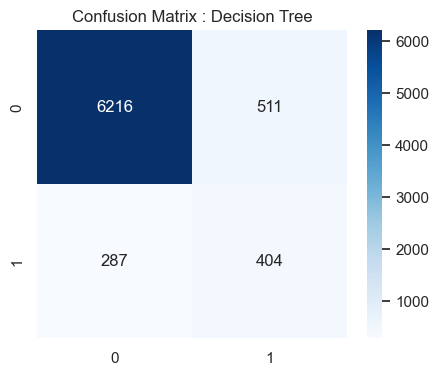

------------------------------------------------------------------------

Xg Boost 

Xg Boost Train Accuracy: 94.19 %

Scores for Xg Boost

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6727
           1       0.50      0.70      0.59       691

    accuracy                           0.91      7418
   macro avg       0.74      0.82      0.77      7418
weighted avg       0.93      0.91      0.91      7418

Test Accuracy: 0.91


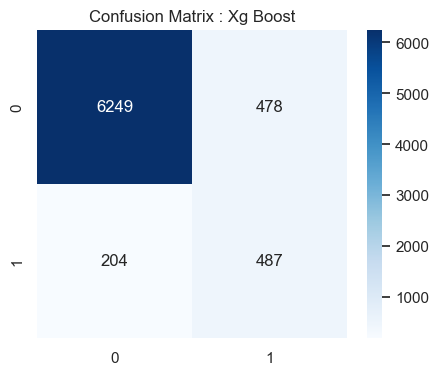

------------------------------------------------------------------------

K Nearest Neighbors 

K Nearest Neighbors Train Accuracy: 93.05 %

Scores for K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6727
           1       0.42      0.82      0.56       691

    accuracy                           0.88      7418
   macro avg       0.70      0.85      0.74      7418
weighted avg       0.93      0.88      0.89      7418

Test Accuracy: 0.88


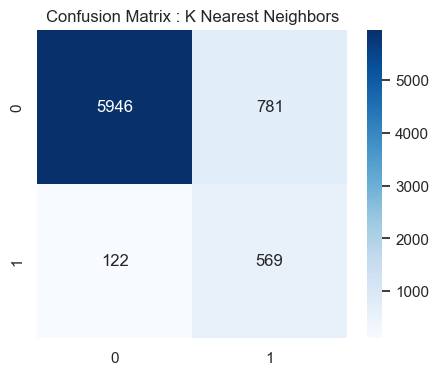

------------------------------------------------------------------------

Gradient Boosting 

Gradient Boosting Train Accuracy: 91.51 %

Scores for Gradient Boosting

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6727
           1       0.43      0.85      0.57       691

    accuracy                           0.88      7418
   macro avg       0.70      0.87      0.75      7418
weighted avg       0.93      0.88      0.90      7418

Test Accuracy: 0.88


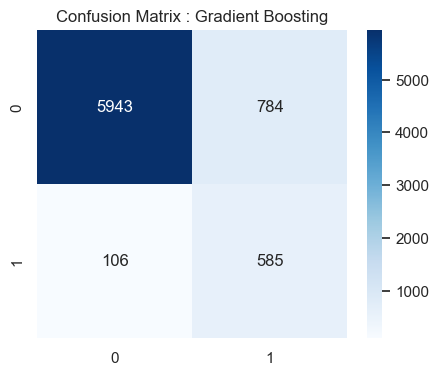

------------------------------------------------------------------------

Voting Classifier(Hard) 

Voting Classifier(Hard) Train Accuracy: 95.02 %

Scores for Voting Classifier(Hard)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6727
           1       0.53      0.70      0.60       691

    accuracy                           0.91      7418
   macro avg       0.75      0.82      0.78      7418
weighted avg       0.93      0.91      0.92      7418

Test Accuracy: 0.91


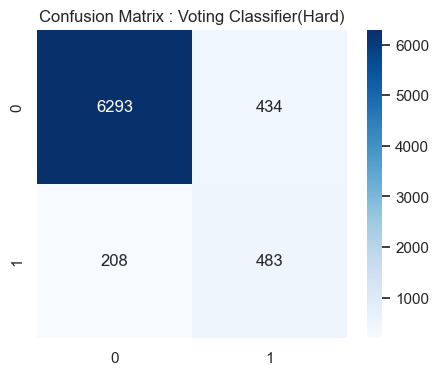

------------------------------------------------------------------------

Voting Classifier(Soft) 

Voting Classifier(Soft) Train Accuracy: 94.64 %

Scores for Voting Classifier(Soft)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6727
           1       0.51      0.65      0.57       691

    accuracy                           0.91      7418
   macro avg       0.74      0.79      0.76      7418
weighted avg       0.92      0.91      0.91      7418

Test Accuracy: 0.91


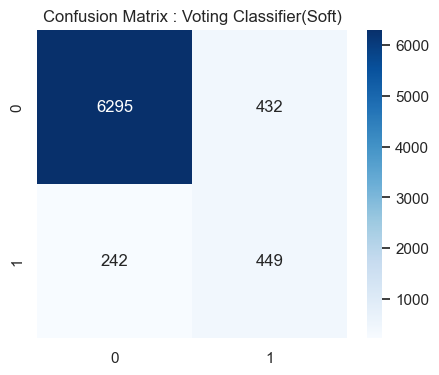

------------------------------------------------------------------------


In [19]:
#1 Logistic regression
log = LogisticRegression(max_iter = 1000)

#2 Random Tree Classifier
random = RandomForestClassifier()

#3 Decision Tree
dtree = DecisionTreeClassifier()

#4 XG Boost
xgb_model = XGBClassifier()

#4 KNN
knn = KNeighborsClassifier()

#5 Gradient Boosting
gb=GradientBoostingClassifier()


xgb = XGBClassifier()
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
dtree = DecisionTreeClassifier()

#6 Voting Hard
voting_hard = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb),('decision_tree', dtree)],
    voting='hard')

xgb = XGBClassifier()
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
dtree = DecisionTreeClassifier()

#7 Voting Soft
voting_soft = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb),('decision_tree', dtree)],
    voting='soft')

cv_dict = {0: 'Logistic Regression', 1:'Random Tree Classifier', 2: 'Decision Tree', 3: 'Xg Boost', 4: 'K Nearest Neighbors', 5: 'Gradient Boosting', 6:'Voting Classifier(Hard)', 7 : 'Voting Classifier(Soft)'}
cv_models=[log,random,dtree,xgb,knn,gb,voting_hard,voting_soft]

accuracy_dict = {}

for i,model in enumerate(cv_models):

    print('=================================================================\n')
    print(cv_dict[i],'\n')

    print("{} Train Accuracy: {} %\n".format(cv_dict[i],round(cross_val_score(model, X_train, Y_train, cv=10, scoring ='accuracy').mean()*100,2))) 

    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)

    accuracy_dict[cv_dict[i]] = round(accuracy_score(ypred, Y_test),2)

    printClassificationAndConfusionMatrix(Y_test,ypred,cv_dict[i])

    print('------------------------------------------------------------------------')



In [20]:
accuracy_dict

{'Logistic Regression': 0.81,
 'Random Tree Classifier': 0.92,
 'Decision Tree': 0.89,
 'Xg Boost': 0.91,
 'K Nearest Neighbors': 0.88,
 'Gradient Boosting': 0.88,
 'Voting Classifier(Hard)': 0.91,
 'Voting Classifier(Soft)': 0.91}

#### GridSearch for Logistic Regression

In [53]:
params_log = {
    'C': [100, 10, 1, 0.1, 0.01],
    'penalty': ['l1', 'l2'],
    'max_iter':[700,1000,1500]
}

#gscv_log = GridSearchCV(estimator = log, param_grid = params_log, cv = 5, n_jobs = -1)


In [54]:
#gscv_log.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'max_iter': [700, 1000, 1500],
                         'penalty': ['l1', 'l2']})

In [55]:
#gscv_log.best_params_

{'C': 1, 'max_iter': 700, 'penalty': 'l2'}

In [58]:
#gscv_log.best_score_

0.8487034089790336

#### GridSearch for XGBoost

In [24]:
parameters = {'n_estimators':[150,200,250], 
              'max_depth':[20,25,30], 
              'learning_rate': [0.2,0.3,0.4]}
#gscv_xgb = GridSearchCV(estimator = xgb_model, param_grid = parameters, cv = 3, n_jobs = -1)

In [25]:
#gscv_xgb.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [20, 25, 30],
                         'n_estimators': [150, 200, 250]})

In [26]:
#gscv_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 250}

In [27]:
#gscv_xgb.best_score_

0.9555997130402061

#### GridSearch for Random Forest

In [28]:
params_random = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [29]:
#gscv_random = GridSearchCV(estimator = random, param_grid = params_random, cv = 3, n_jobs = -1)

In [31]:
#gscv_random.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [32]:
#gscv_random.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [33]:
#gscv_random.best_score_

0.9139110281017854

#### GridSearch for Decision Tree

In [34]:
params_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [35]:
#gscv_dtree = GridSearchCV(estimator = dtree, param_grid = params_dtree, cv = 3, n_jobs = -1)

In [36]:
#gscv_dtree.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [37]:
#gscv_dtree.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [38]:
#gscv_dtree.best_score_

0.9022628784277863

We can see from the GridSearch results that XGBoost with grid seaarch performs quite well, while logistic regression, random forest and decision tree do the best on the there default settings.

### Best models after Hyperparameter tunig with GridSearchCV 


Random Tree Classifier 

Random Tree Classifier Train Accuracy: 95.25 %

Scores for Random Tree Classifier

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6727
           1       0.54      0.69      0.61       691

    accuracy                           0.92      7418
   macro avg       0.75      0.82      0.78      7418
weighted avg       0.93      0.92      0.92      7418

Test Accuracy: 0.92


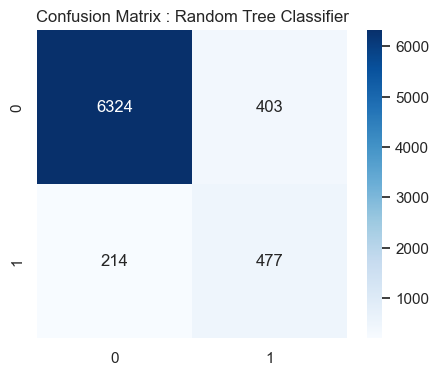

------------------------------------------------------------------------

Decision Tree 

Decision Tree Train Accuracy: 92.96 %

Scores for Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6727
           1       0.44      0.58      0.50       691

    accuracy                           0.89      7418
   macro avg       0.70      0.75      0.72      7418
weighted avg       0.91      0.89      0.90      7418

Test Accuracy: 0.89


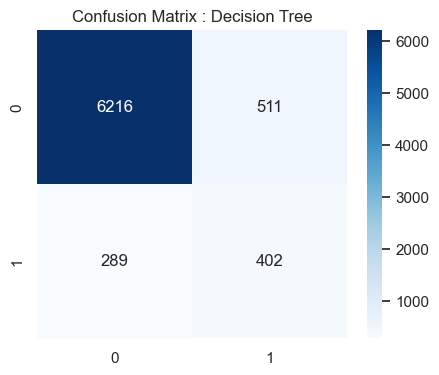

------------------------------------------------------------------------

Xg Boost 

Xg Boost Train Accuracy: 95.56 %

Scores for Xg Boost

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6727
           1       0.56      0.65      0.60       691

    accuracy                           0.92      7418
   macro avg       0.76      0.80      0.78      7418
weighted avg       0.93      0.92      0.92      7418

Test Accuracy: 0.92


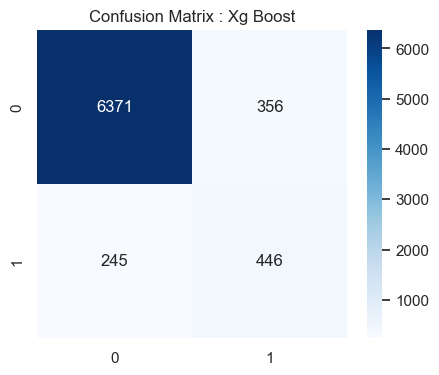

------------------------------------------------------------------------

Voting Classifier(Hard) 

Voting Classifier(Hard) Train Accuracy: 95.42 %

Scores for Voting Classifier(Hard)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6727
           1       0.55      0.66      0.60       691

    accuracy                           0.92      7418
   macro avg       0.76      0.80      0.78      7418
weighted avg       0.93      0.92      0.92      7418

Test Accuracy: 0.92


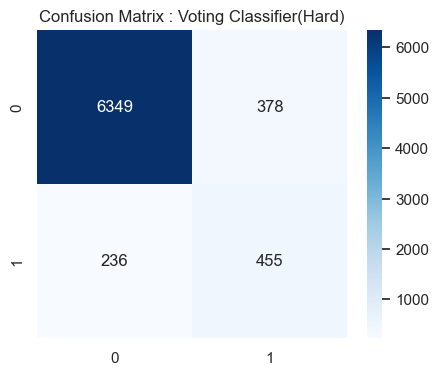

------------------------------------------------------------------------

Voting Classifier(Soft) 

Voting Classifier(Soft) Train Accuracy: 95.08 %

Scores for Voting Classifier(Soft)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6727
           1       0.52      0.64      0.58       691

    accuracy                           0.91      7418
   macro avg       0.74      0.79      0.76      7418
weighted avg       0.92      0.91      0.92      7418

Test Accuracy: 0.91


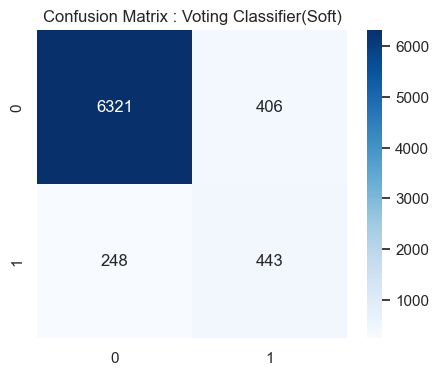

------------------------------------------------------------------------


In [21]:
#1 Best XGBoost Model
best_xgb_model = XGBClassifier(learning_rate= 0.2, max_depth= 30, n_estimators= 250)

#2 Best Random Forest Model
best_random_forest_model = RandomForestClassifier()

#3 Best Decision Tree Model
best_dtree_model = DecisionTreeClassifier()


best_xgb_model = XGBClassifier(learning_rate= 0.2, max_depth= 30, n_estimators= 250)
best_random_forest_model = RandomForestClassifier()
best_dtree_model = DecisionTreeClassifier()

#4 Voting Hard
voting_hard_best = VotingClassifier(
    estimators=[('random_forest', best_random_forest_model), ('xg_boost', best_xgb_model),('decision_tree', best_dtree_model)],
    voting='hard')


best_xgb_model = XGBClassifier(learning_rate= 0.2, max_depth= 30, n_estimators= 250)
best_random_forest_model = RandomForestClassifier()
best_dtree_model = DecisionTreeClassifier()

#5 Voting Soft
voting_soft_best = VotingClassifier(
    estimators=[('random_forest', best_random_forest_model), ('xg_boost', best_xgb_model),('decision_tree', best_dtree_model)],
    voting='soft')

cv_dict = {0: 'Random Tree Classifier', 1: 'Decision Tree', 2: 'Xg Boost', 3:'Voting Classifier(Hard)', 4 : 'Voting Classifier(Soft)'}
cv_models=[best_random_forest_model,best_dtree_model,best_xgb_model,voting_hard_best,voting_soft_best]

best_accuracy_dict = {}

for i,model in enumerate(cv_models):

    print('=================================================================\n')
    print(cv_dict[i],'\n')

    print("{} Train Accuracy: {} %\n".format(cv_dict[i],round(cross_val_score(model, X_train, Y_train, cv=10, scoring ='accuracy').mean()*100,2))) 

    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)

    best_accuracy_dict[cv_dict[i]] = round(accuracy_score(ypred, Y_test),2)

    printClassificationAndConfusionMatrix(Y_test,ypred,cv_dict[i])

    print('------------------------------------------------------------------------')

In [22]:
best_accuracy_dict

{'Random Tree Classifier': 0.92,
 'Decision Tree': 0.89,
 'Xg Boost': 0.92,
 'Voting Classifier(Hard)': 0.92,
 'Voting Classifier(Soft)': 0.91}

### ROC Curve

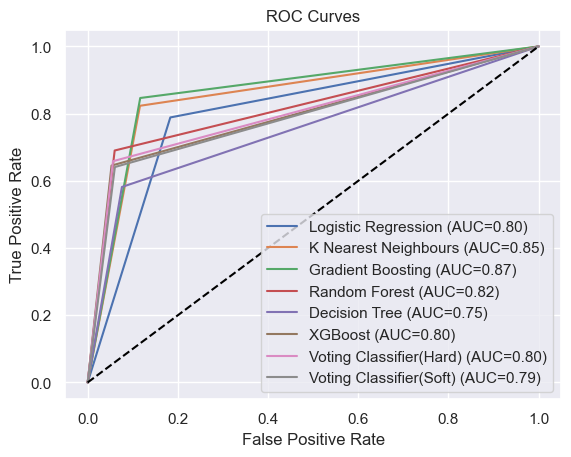

In [28]:

models = [
    log,
    knn,
    gb,
    best_random_forest_model,
    best_dtree_model,
    best_xgb_model,
    voting_hard_best,
    voting_soft_best    
]

y_preds = [model.predict(X_test) for model in models]

roc_curves = [roc_curve(Y_test, y_pred) for y_pred in y_preds]
auc_scores = [auc(roc_curve[0], roc_curve[1]) for roc_curve in roc_curves]
model_name = ['Logistic Regression','K Nearest Neighbours','Gradient Boosting', 'Random Forest', 'Decision Tree', 'XGBoost', 'Voting Classifier(Hard)', 'Voting Classifier(Soft)']

fig, ax = plt.subplots()
for roc_curve, auc_score, model_name in zip (roc_curves,auc_scores,model_name):
    ax.plot(roc_curve[0], roc_curve[1], label=f"{model_name} (AUC={auc_score:.2f})")

plt.plot([0, 1], [0, 1.0], '--', color='black')


ax.set_title("ROC Curves")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()

plt.show()
